# IPO Analysis Template Notebook (HK / SG / Shanghai)
### Case Study: Shenzhen Edge Medical Co., Ltd. — **EDGE MEDICAL-B (02675.HK)**

**Created:** 2026-02-19  
**Goal:** Provide a reusable, institutional-style IPO analysis template (business + tech moat + financials + valuation + risks + post-IPO monitoring), with Edge Medical as a worked example.

**Primary filings / references (start here):**
- HKEX prospectus (Edge Medical, Dec 30, 2025): https://www1.hkexnews.hk/listedco/listconews/sehk/2025/1230/2025123000029.pdf
- HKEX trading arrangement notice (new listing particulars): https://www.hkex.com.hk/eng/market/sec_tradinfo/tradarng/tradarng_news/premonth/e2675a_260105.htm
- Reuters (Jan 8, 2026) IPO debut context (Edge Medical / Zhipu / Iluvatar): https://www.reuters.com/world/asia-pacific/chinese-tech-companies-led-by-zhipu-ai-climb-hong-kong-debut-2026-01-08/
- Offer price / proceeds (HKEX filing): https://www1.hkexnews.hk/listedco/listconews/sehk/2026/0204/2026020402144.pdf
- Use of proceeds snapshot (public PDF summary): https://www.ccnew.com.hk/home/upload/ipo/20251230091723_1734205700.pdf

> Note: This notebook is designed to be **data-source agnostic**. You can plug in numbers from prospectus, earnings releases, Bloomberg/FactSet, or your own database pipeline.


## Quick links to learn & follow (HK / SG / Shanghai)

**Filings & official sources**
- HKEXnews Title Search (prospectus, allotment results, announcements): https://www1.hkexnews.hk/search/titlesearch.xhtml
- SGX Rulebook — Mainboard Rules: https://rulebook.sgx.com/rulebook/mainboard-rules
- Shanghai Stock Exchange (SSE) STAR Market — Stock Listing Rules (English PDF): https://english.sse.com.cn/start/sserules/stocks/listing/c/10643502/files/297d0066740a4761b7c1b60337e94882.pdf

**Market monitoring / frameworks**
- EY Global IPO trends (key highlights + outlook): https://www.ey.com/en_us/insights/ipo/trends
- Aswath Damodaran — IPO lessons (valuation mindset, dilution, pricing): https://aswathdamodaran.blogspot.com/2019/10/ipo-lessons-for-public-market-investors.html

> Tip: For each IPO you track, bookmark (1) prospectus, (2) allotment results announcement, (3) first interim report, (4) post-IPO lock-up expiry dates.


## 0) Environment setup

If you are running locally, create a dedicated environment for reproducibility.


In [1]:
# Core
import math
import numpy as np
import pandas as pd

# Viz
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 160)


## 1) Company snapshot (editable)

Fill in the structured metadata once. This makes it easy to standardize comparisons across IPOs.


In [2]:
company = {
    "name": "Shenzhen Edge Medical Co., Ltd.",
    "short_name": "EDGE MEDICAL-B",
    "ticker": "02675.HK",
    "exchange": "HKEX",
    "sector": "Medical Devices / Surgical Robotics",
    "founded_year": 2017,
    "listing_date": "2026-01-08",
    "board_lot": 100,
    "offer_price_hkd": 43.24,   # Offer price per H Share (HKD)
    "currency_reporting": "RMB",
    "links": {
        "prospectus_hkex_pdf": "https://www1.hkexnews.hk/listedco/listconews/sehk/2025/1230/2025123000029.pdf",
        "trading_arrangement_notice": "https://www.hkex.com.hk/eng/market/sec_tradinfo/tradarng/tradarng_news/premonth/e2675a_260105.htm",
        "over_allotment_notice": "https://www1.hkexnews.hk/listedco/listconews/sehk/2026/0204/2026020402144.pdf",
    }
}
company


{'name': 'Shenzhen Edge Medical Co., Ltd.',
 'short_name': 'EDGE MEDICAL-B',
 'ticker': '02675.HK',
 'exchange': 'HKEX',
 'sector': 'Medical Devices / Surgical Robotics',
 'founded_year': 2017,
 'listing_date': '2026-01-08',
 'board_lot': 100,
 'offer_price_hkd': 43.24,
 'currency_reporting': 'RMB',
 'links': {'prospectus_hkex_pdf': 'https://www1.hkexnews.hk/listedco/listconews/sehk/2025/1230/2025123000029.pdf',
  'trading_arrangement_notice': 'https://www.hkex.com.hk/eng/market/sec_tradinfo/tradarng/tradarng_news/premonth/e2675a_260105.htm',
  'over_allotment_notice': 'https://www1.hkexnews.hk/listedco/listconews/sehk/2026/0204/2026020402144.pdf'}}

## 2) Financial track record (prospectus numbers)

### Edge Medical — **Historical Financial Information (RMB'000)**

Source: HKEX prospectus (Accountants’ Report, Appendix I).

| Period | Revenue | Gross Profit | Net loss (Loss for period) |
|---|---:|---:|---:|
| FY2023 | 48,042 | 28,466 | (212,869) |
| FY2024 | 159,994 | 98,077 | (218,509) |
| 1H2024 (unaudited) | 30,245 | 19,157 | (132,567) |
| 1H2025 | 149,383 | 93,850 | (89,087) |

**Quick notes (template prompts):**
- Track whether revenue jump is **one-off (recognition timing / channel fill)** vs **sustained (installed base, consumables, service)**.
- Compare **R&D + S&M intensity** vs peers (Intuitive Surgical, domestic surgical robotics, etc.).


In [3]:
# --- Prospectus financials (RMB) ---
# Units in the prospectus tables are RMB'000. We convert to RMB.
financials = pd.DataFrame(
    [
        {"period": "FY2023", "revenue": 48_042e3, "gross_profit": 28_466e3, "net_income": -212_869e3},
        {"period": "FY2024", "revenue": 159_994e3, "gross_profit": 98_077e3, "net_income": -218_509e3},
        {"period": "1H2024", "revenue": 30_245e3, "gross_profit": 19_157e3, "net_income": -132_567e3},
        {"period": "1H2025", "revenue": 149_383e3, "gross_profit": 93_850e3, "net_income": -89_087e3},
    ]
)

financials["gross_margin"] = financials["gross_profit"] / financials["revenue"]
financials["net_margin"] = financials["net_income"] / financials["revenue"]

financials


,period,revenue,gross_profit,net_income,gross_margin,net_margin
0,FY2023,48042000.0,28466000.0,-212869000.0,0.592523,-4.430894
1,FY2024,159994000.0,98077000.0,-218509000.0,0.613004,-1.365732
2,1H2024,30245000.0,19157000.0,-132567000.0,0.633394,-4.383105
3,1H2025,149383000.0,93850000.0,-89087000.0,0.628251,-0.596366


### 2.1 KPI helpers

These functions standardize common IPO metrics:
- Growth (YoY), annualized run-rate (for interim periods)
- Gross margin (if gross profit available)
- Net margin


In [6]:
def yoy_growth(curr, prev):
    if prev is None or pd.isna(prev) or prev == 0 or pd.isna(curr):
        return np.nan
    return (curr / prev) - 1.0

def safe_div(a, b):
    if b is None or pd.isna(b) or b == 0 or pd.isna(a):
        return np.nan
    return a / b

def annualize_interim(value, months=6):
    # Simple annualization: value * (12 / months)
    if value is None or pd.isna(value):
        return np.nan
    return value * (12 / months)

kpi = financials.copy()
kpi["revenue_yoy"] = [np.nan, yoy_growth(kpi.loc[1,"revenue"], kpi.loc[0,"revenue"]), np.nan]
kpi["gross_margin"] = kpi.apply(lambda r: safe_div(r["gross_profit"], r["revenue"]), axis=1)
kpi["net_margin"] = kpi.apply(lambda r: safe_div(r["net_income"], r["revenue"]), axis=1)
kpi


ValueError: Length of values (3) does not match length of index (4)

### 2.2 Quick charts

Default matplotlib colors (no styling overrides).


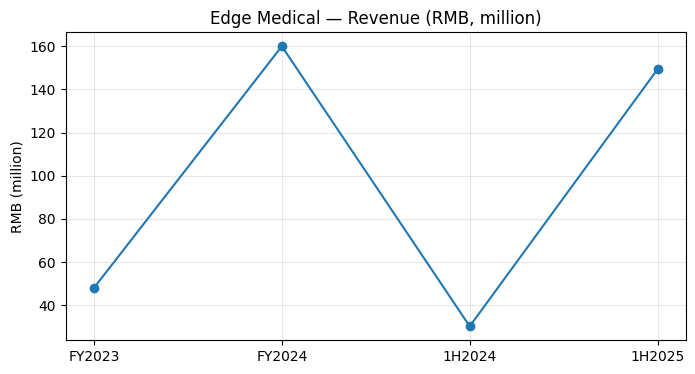

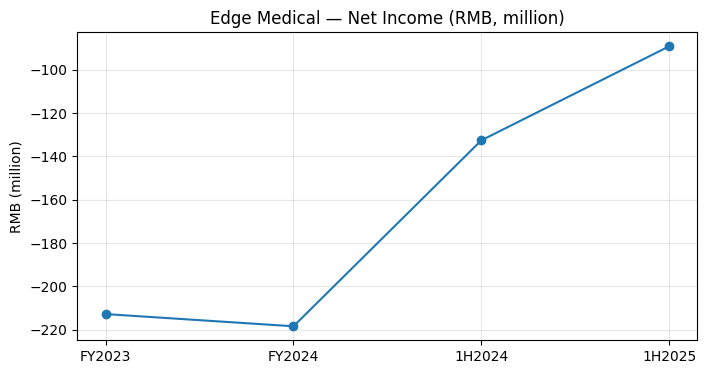

In [7]:
# Revenue trend
plt.figure(figsize=(8,4))
plt.plot(financials["period"], financials["revenue"]/1e6, marker="o")
plt.title("Edge Medical — Revenue (RMB, million)")
plt.ylabel("RMB (million)")
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3)
plt.show()

# Net income trend
plt.figure(figsize=(8,4))
plt.plot(financials["period"], financials["net_income"]/1e6, marker="o")
plt.title("Edge Medical — Net Income (RMB, million)")
plt.ylabel("RMB (million)")
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3)
plt.show()


## 3) Deal terms & proceeds

For HK IPOs, make sure you capture:
- Offer price, offer size, greenshoe (over-allotment)
- Gross proceeds vs net proceeds (fees)
- Cornerstone investors (if any)
- Lock-up structure


In [8]:
# --- Deal terms (from HKEX prospectus summary / use-of-proceeds section) ---
deal = {
    "offer_price_hkd": 43.24,
    "net_proceeds_hkd": 1_116.6e6,  # assuming no over-allotment option is exercised
    # Share capital / share count
    # Prospectus states: total shares in issue pre-offering 360,000,000; post-offering 387,722,200
    "shares_pre_ipo": 360_000_000,
    "shares_post_ipo": 387_722_200,
    # Use of proceeds allocation (percent of net proceeds)
    "use_of_proceeds_pct": {
        "R&D: Multi-Port Endoscopic Surgical Robot": 0.23,
        "R&D: Single-Port Endoscopic Surgical Robot": 0.19,
        "Commercialization of Core Products": 0.20,
        "Expand manufacturing capacity": 0.10,
        "Other products & product candidates": 0.08,
        "Strategic M&A / investments / collaborations": 0.10,
        "Working capital & general corporate purposes": 0.10,
    },
}

deal


{'offer_price_hkd': 43.24,
 'net_proceeds_hkd': 1116600000.0,
 'shares_pre_ipo': 360000000,
 'shares_post_ipo': 387722200,
 'use_of_proceeds_pct': {'R&D: Multi-Port Endoscopic Surgical Robot': 0.23,
  'R&D: Single-Port Endoscopic Surgical Robot': 0.19,
  'Commercialization of Core Products': 0.2,
  'Expand manufacturing capacity': 0.1,
  'Other products & product candidates': 0.08,
  'Strategic M&A / investments / collaborations': 0.1,
  'Working capital & general corporate purposes': 0.1}}

### 3.1 Use-of-proceeds allocation (visual)

A quick check: does spending match the investment thesis?


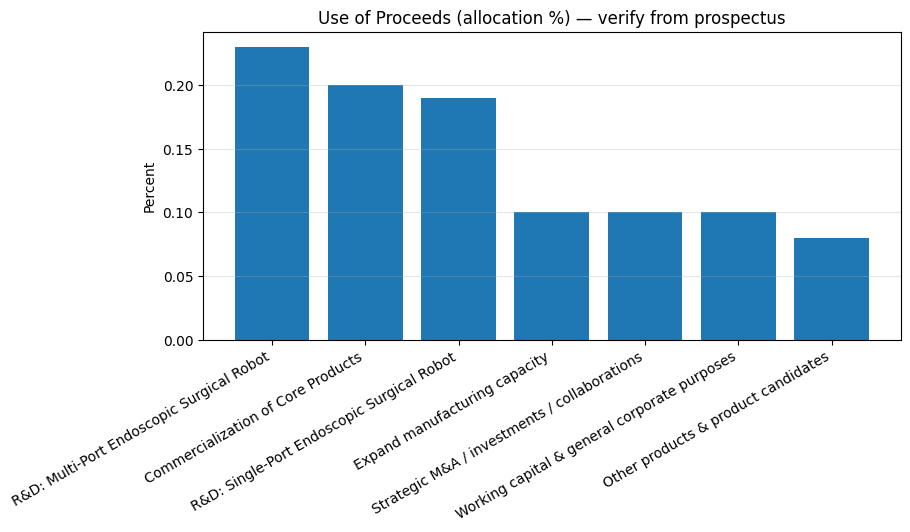

,pct
R&D: Multi-Port Endoscopic Surgical Robot,0.23
Commercialization of Core Products,0.20
R&D: Single-Port Endoscopic Surgical Robot,0.19
Expand manufacturing capacity,0.10
Strategic M&A / investments / collaborations,0.10
Working capital & general corporate purposes,0.10
Other products & product candidates,0.08


In [9]:
uop = pd.Series(deal["use_of_proceeds_pct"]).sort_values(ascending=False)
plt.figure(figsize=(9,4))
plt.bar(uop.index, uop.values)
plt.title("Use of Proceeds (allocation %) — verify from prospectus")
plt.ylabel("Percent")
plt.xticks(rotation=30, ha="right")
plt.grid(True, axis="y", alpha=0.3)
plt.show()

uop.to_frame("pct")


## 4) Product, technology moat & evidence pack

For “hard-tech” IPOs (robotics, AI chips, LiDAR, medtech devices), build a **moat evidence pack**.

### Checklist (fill with evidence)
- ✅ Regulatory approvals (NMPA, FDA, CE, etc.)  
- ✅ Clinical adoption / installed base / training centers  
- ✅ Patents / defensible IP  
- ✅ Manufacturing readiness (yield, QA, suppliers)  
- ✅ Unit economics (gross margin by product line)  
- ✅ Competitive landscape (domestic + global)

> In the case of Edge Medical, the IPO materials highlight multi-port & single-port surgical robots and expansion of commercialization and R&D (verify in prospectus).


In [ ]:
moat = pd.DataFrame(
    [
        {"dimension":"Regulatory approvals", "what_to_collect":"Approval letters, scope, indication, geography", "edge_medical_notes":"(Add from prospectus/press)"},
        {"dimension":"Installed base & utilization", "what_to_collect":"# systems installed, utilization rate, # hospitals, training centers", "edge_medical_notes":"(Add)"},
        {"dimension":"IP / patents", "what_to_collect":"Patent count by jurisdiction + key claims + expiry", "edge_medical_notes":"(Add)"},
        {"dimension":"Clinical outcomes", "what_to_collect":"Trial results, safety, endpoints, comparisons", "edge_medical_notes":"(Add)"},
        {"dimension":"Manufacturing & supply chain", "what_to_collect":"Key suppliers, single-source risks, capacity expansion plan", "edge_medical_notes":"(Add)"},
        {"dimension":"Competitive landscape", "what_to_collect":"Peers, price/performance, go-to-market differences", "edge_medical_notes":"(Add)"},
    ]
)
moat


## 5) Peer set & valuation framework

### 5.1 Choose peers (3 buckets)
- **Global leaders** (e.g., Intuitive Surgical for robotic surgery)
- **China / Asia medtech & robotics comps**
- **Adjacent comps** (hospital equipment, endoscopy, minimally invasive tools)

### 5.2 Valuation methods
- EV/Sales (common when loss-making)
- Gross profit multiple (if gross profit is stable & comparable)
- DCF only if you can defend long-term assumptions


In [10]:
# Fill peers with your chosen comparables (tickers + key multiples).
peers = pd.DataFrame(
    [
        {"name":"Intuitive Surgical", "ticker":"ISRG", "market":"US", "ev_sales_fwd": np.nan, "notes":"Global benchmark for surgical robotics"},
        {"name":"(Add China peer 1)", "ticker":"", "market":"CN/HK", "ev_sales_fwd": np.nan, "notes":""},
        {"name":"(Add China peer 2)", "ticker":"", "market":"CN/HK", "ev_sales_fwd": np.nan, "notes":""},
    ]
)
peers


,name,ticker,market,ev_sales_fwd,notes
0,Intuitive Surgical,ISRG,US,NaN,Global benchmark for surgical robotics
1,(Add China peer 1),,CN/HK,NaN,
2,(Add China peer 2),,CN/HK,NaN,


### 5.3 Edge Medical — scenario valuation (template)

You need:
- Shares outstanding (post-IPO) or market cap at offer
- Net debt / cash (from balance sheet)
- Forward sales estimate (run-rate)

This cell is built so you can plug in real values after extracting from prospectus/financials.


In [11]:
# --- Simple valuation helpers (template) ---
shares_outstanding = deal["shares_post_ipo"]  # post-IPO total shares (assuming no over-allotment)

# Balance sheet (RMB'000) from prospectus Accountants’ Report (Appendix I) — as at Jun 30, 2025
cash_rmb = 94_457e3
lease_liabilities_current_rmb = 6_762e3
lease_liabilities_noncurrent_rmb = 6_859e3
# (No interest-bearing debt shown in the selected statement; update here if you extract any borrowings)
net_cash_rmb = cash_rmb - (lease_liabilities_current_rmb + lease_liabilities_noncurrent_rmb)

shares_outstanding, net_cash_rmb


(387722200, 80836000.0)

## 6) Governance, incentives & red flags

For IPOs, many blow-ups come from governance, not technology.
Score each item with evidence from prospectus.


In [12]:
risk_checklist = pd.DataFrame(
    [
        {"category":"Governance", "item":"Founder control / WVR / related-party transactions", "score_0to5": np.nan, "evidence_link": ""},
        {"category":"Customers", "item":"Top-5 revenue concentration", "score_0to5": np.nan, "evidence_link": ""},
        {"category":"Product", "item":"Single-product dependency / pipeline maturity", "score_0to5": np.nan, "evidence_link": ""},
        {"category":"Regulatory", "item":"Approval risk / post-market surveillance", "score_0to5": np.nan, "evidence_link": ""},
        {"category":"Manufacturing", "item":"Single-source components / yield risks", "score_0to5": np.nan, "evidence_link": ""},
        {"category":"Financial", "item":"Cash runway (<24 months) / refinancing risk", "score_0to5": np.nan, "evidence_link": ""},
        {"category":"Market", "item":"Pricing pressure / reimbursement / adoption barriers", "score_0to5": np.nan, "evidence_link": ""},
    ]
)
risk_checklist


,category,item,score_0to5,evidence_link
0,Governance,Founder control / WVR / related-party transact...,NaN,
1,Customers,Top-5 revenue concentration,NaN,
2,Product,Single-product dependency / pipeline maturity,NaN,
3,Regulatory,Approval risk / post-market surveillance,NaN,
4,Manufacturing,Single-source components / yield risks,NaN,
5,Financial,Cash runway (<24 months) / refinancing risk,NaN,
6,Market,Pricing pressure / reimbursement / adoption ba...,NaN,


## 7) Post-IPO monitoring plan (90 days / 1 year)

### 7.1 What to track weekly (first 90 days)
- Price vs offer, volume, free float
- Insider / cornerstone lock-up dates
- Any supplemental HKEX filings (over-allotment, share awards, etc.)
- Major contract wins, regulatory milestones, hospital deployments

### 7.2 What to track quarterly (1 year)
- Revenue mix (domestic vs overseas)
- Gross margin trend (hardware vs consumables/services)
- R&D cadence vs roadmap
- Unit installs, utilization, training center expansion


In [13]:
monitoring = pd.DataFrame(
    [
        {"horizon":"Weekly (0-90d)", "metric":"Price vs offer", "how":"% change vs HK$ offer", "notes":""},
        {"horizon":"Weekly (0-90d)", "metric":"Volume / liquidity", "how":"Avg daily turnover, spread", "notes":""},
        {"horizon":"Event-driven", "metric":"HKEX filings", "how":"Check announcements & circulars", "notes":company["links"]["prospectus_hkex_pdf"]},
        {"horizon":"Quarterly", "metric":"Revenue & GM", "how":"Earnings vs prospectus track record", "notes":""},
        {"horizon":"Quarterly", "metric":"Cash runway", "how":"Cash burn vs net proceeds plan", "notes":""},
        {"horizon":"Quarterly", "metric":"Operational KPIs", "how":"# installs, utilization, hospital count", "notes":""},
    ]
)
monitoring


,horizon,metric,how,notes
0,Weekly (0-90d),Price vs offer,% change vs HK$ offer,
1,Weekly (0-90d),Volume / liquidity,"Avg daily turnover, spread",
2,Event-driven,HKEX filings,Check announcements & circulars,https://www1.hkexnews.hk/listedco/listconews/s...
3,Quarterly,Revenue & GM,Earnings vs prospectus track record,
4,Quarterly,Cash runway,Cash burn vs net proceeds plan,
5,Quarterly,Operational KPIs,"# installs, utilization, hospital count",


## 8) Output: One-page IC memo (template)

Fill this and export to PDF for your investment committee / personal decision log.


In [14]:
ic_memo = {
    "Thesis (1-2 lines)": "",
    "What must be true? (3 bullets)": ["", "", ""],
    "Key risks (3 bullets)": ["", "", ""],
    "Valuation view": "",
    "Catalysts (0-12m)": ["", "", ""],
    "Decision": "Watch / Buy / Avoid / Needs more data",
    "Next actions": ["Extract full prospectus financial tables", "Build peer comp table with live multiples", "Define lock-up calendar"]
}
ic_memo


{'Thesis (1-2 lines)': '',
 'What must be true? (3 bullets)': ['', '', ''],
 'Key risks (3 bullets)': ['', '', ''],
 'Valuation view': '',
 'Catalysts (0-12m)': ['', '', ''],
 'Decision': 'Watch / Buy / Avoid / Needs more data',
 'Next actions': ['Extract full prospectus financial tables',
  'Build peer comp table with live multiples',
  'Define lock-up calendar']}